# (Prosper Loan Data Exploration Title)
## by (Abanoub Youssef)

## Introduction

This document explores a dataset containing loan lists from 2005Q4 till 2014Q1 through 81 variables classified into 3 category 

1. Borrower data
2. Loan data
3. Credit Risk metrics 

And i am interested in finding the relation between many variables for examble

1. The affect of the employment status and occupation and monthly salary to the loan amount
2. What are the factors leading to higher current delinquencies rate 
3. Is there any relation between the customer risk score and the loan original amount 

In [77]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading data and fast reviewing the structure and its columns type

In [78]:
# loading the dataset
df=pd.read_csv("prosperLoanData.csv")
print(df.shape)
print(df.info())
df.head()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Basics information about the dataset

### What is the structure of your dataset?

The structure of the dataset is 113,937 rows, 81 columns containing data about the loans from quarter four in 2005 to quarter one in 2014

### What is/are the main feature(s) of interest in your dataset?

I am intersted in finding
  
1. what affects the borrowers APR or interest rate?
2. is people prefere to take loan with specific tearm?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will explore many fitures in order to get better understand to the data and trying to find the best answeres of the main questions.

CreditGrade, Term, LoanStatus, BorrowerAPR, LenderYield, ProsperRating (Alpha), ProsperScore, ListingCategory, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentDelinquencies ,IncomeRange, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationQuarter

And other variables if needed


## Univariate Exploration

Here we will start to see the distribution of each variable and we will start by creating functions to not repete the code.

In [79]:
#Function to plot a horizontal bar
def plot_horizontal_bar(dataframe,column_name):
    color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,y=column_name,color=color,order=column_name_count.index)
    return(plot)

In [80]:
#function to plot the virtical bar
def plot_vertical_bar(dataframe,column_name):
    color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,x=column_name,color=color,order=column_name_count.index);
    return(plot)

In [81]:
def plot_hist(dataframe,column_name,bin_stip):
    bins=np.arange(dataframe[column_name].min(),dataframe[column_name].max()+bin_stip,bin_stip)
    plot=plt.hist(data=dataframe,x=column_name,bins=bins);
    return(plot)

### Starting with the columns related to the Borrower

#### Employment Status column
    I am interesting to know how many peoples have a job

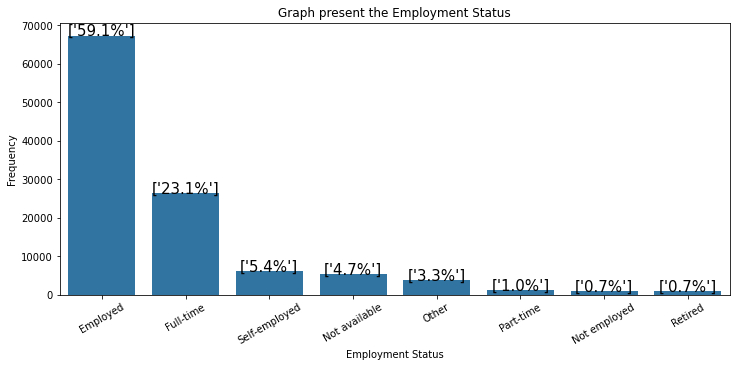

In [82]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"EmploymentStatus");
plt.xticks(rotation=30);
plt.xlabel("Employment Status")
plt.ylabel("Frequency")
plt.title("Graph present the Employment Status")


# ploting the percentage above each column
column_count=df["EmploymentStatus"].value_counts()
locs,labels=plt.xticks(rotation = 30)
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15)


* I will assume that Employed means full_time 
* This link to help in replacing any thing in pandas dataframe [Link](https://datatofish.com/replace-values-pandas-dataframe/)

In [83]:
#replacing the word Employed by Full-time
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['Employed'],'Full-time')

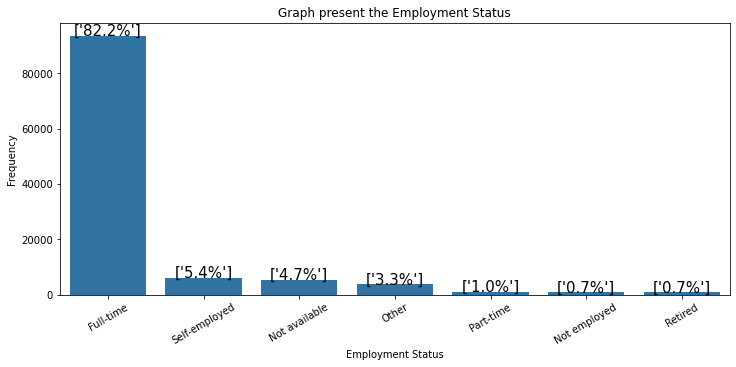

In [84]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"EmploymentStatus");
plt.xticks(rotation=30);
plt.xlabel("Employment Status")
plt.ylabel("Frequency")
plt.title("Graph present the Employment Status")

# ploting the percentage above each column
column_count=df["EmploymentStatus"].value_counts()
locs,labels=plt.xticks(rotation = 30)
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15)

From this graph we can note that around 82% have a full time job 

#### Income Range column
    I am interesting to know what is the most common reange 

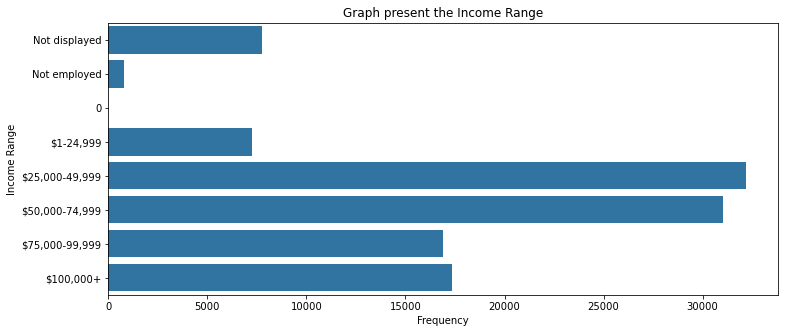

In [85]:
#making the order list for the graph 
order_list=["Not displayed","Not employed","0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]

#ploting the bar chart
plt.figure(figsize=[12,5])
color=sb.color_palette()[0]
sb.countplot(data=df,y="IncomeRange",color=color,order=order_list);

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Income Range")
plt.title("Graph present the Income Range");

In [86]:
(df["IncomeRange"].value_counts()/df.shape[0])*100

$25,000-49,999    28.254211
$50,000-74,999    27.251902
$100,000+         15.216304
$75,000-99,999    14.846801
Not displayed      6.794106
$1-24,999          6.384230
Not employed       0.707408
$0                 0.545038
Name: IncomeRange, dtype: float64

* Around 28% of people have income range between 25,000-49,999 and 27% have income range between 50,000-74,999

#### Stated Monthly Income column
    I am interesting to know what is the most common income salary per month 

In [87]:
df["StatedMonthlyIncome"].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

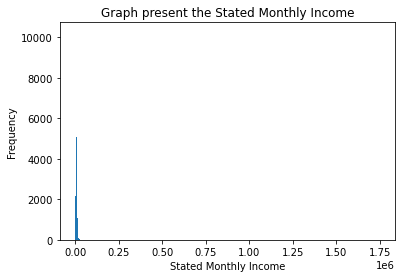

In [88]:
bins=np.arange(0,df["StatedMonthlyIncome"].max()+500,500)
plt.hist(data=df,x="StatedMonthlyIncome",bins=bins);

#labels and title
plt.xlabel("Stated Monthly Income")
plt.ylabel("Frequency")
plt.title("Graph present the Stated Monthly Income");

* We can't see anything so we will try to make a limit for the x axis

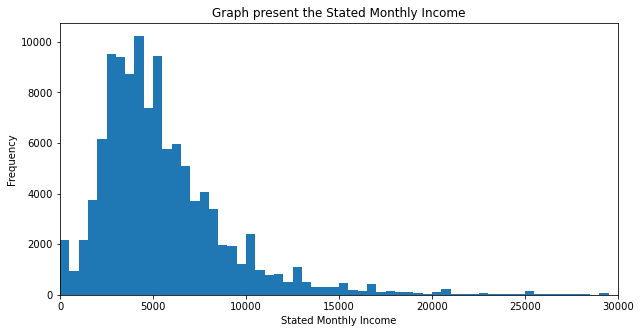

In [89]:
plt.figure(figsize=[10,5])
# making limit in x axis 
bins=np.arange(0,df["StatedMonthlyIncome"].max()+500,500)
plt.hist(data=df,x="StatedMonthlyIncome",bins=bins);
plt.xlim(0,30000);

#labels and title
plt.xlabel("Stated Monthly Income")
plt.ylabel("Frequency")
plt.title("Graph present the Stated Monthly Income");

* The graph is right skewed and we can note a beak around 3K and 5K
* We will try to implement the log scale

In [90]:
np.log10(df["StatedMonthlyIncome"].describe())

C:\Users\sesa536669\New folder\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056665
mean     3.748810
std      3.873814
min          -inf
25%      3.505195
50%      3.669007
75%      3.834103
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

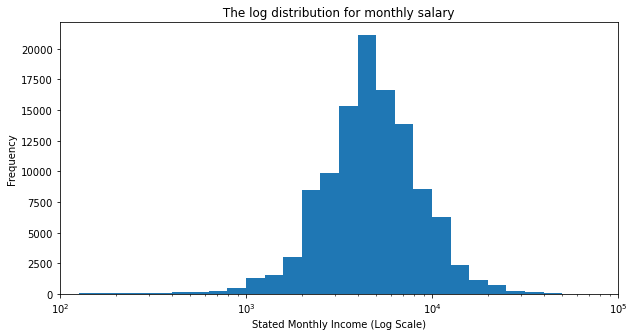

In [91]:
plt.figure(figsize=[10,5])
#implementing the log scale
bins=10**np.arange(0,6.2+1,0.1)
plt.hist(data=df,x="StatedMonthlyIncome",bins=bins)
plt.xscale("log")
# making limit for the x axis to get bitter insites
plt.xlim(1e2,1e5)

# lables and title for the graph
plt.xlabel("Stated Monthly Income (Log Scale)")
plt.ylabel("Frequency")
plt.title(" The log distribution for monthly salary ");

* The log distribution is normaly distributed and we have a beak between 3K and 5K

#### 4. Occupation column
    I am interesting to know what is the most occupation taking a loan 

In [92]:
# making new dataframe to contian the most frequently occupations to avoid crawding
Occupation_frequency=df["Occupation"].value_counts()
ind=np.sum(Occupation_frequency>500) #will select the possitions repeted more than 500 times
print(ind)
most_Occupation=Occupation_frequency.index[:ind]
new_df=df[df["Occupation"].isin(most_Occupation)]

31


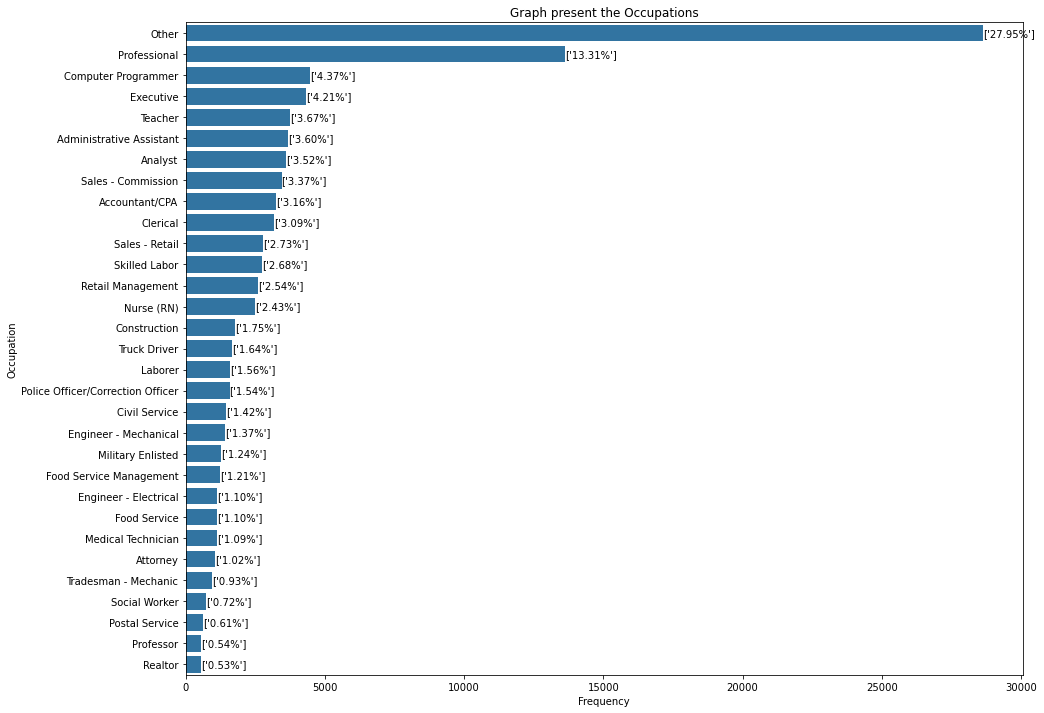

In [93]:
#ploting the bar chart
plt.figure(figsize=[15,12])
plot_horizontal_bar(new_df,"Occupation")

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Occupation")
plt.title("Graph present the Occupations");

#add % at the end of each bar
occupation_count=new_df["Occupation"].value_counts()
for i in range(occupation_count.shape[0]):
    count=occupation_count[i]
    pct_string=["{:0.2f}%".format(100*count/new_df.shape[0])]
    plt.text(count+1,i,pct_string,va="center")

* The most know position taking a loan is computer programmer

#### 5. Is Borrower Home owner column
    I am interesting to know what is is there a huge difference in the population related to own a home?

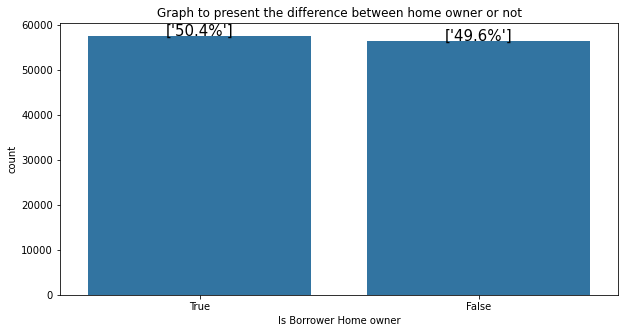

In [94]:
plt.figure(figsize=[10,5])
plot_vertical_bar(df,"IsBorrowerHomeowner");
plt.xlabel("Is Borrower Home owner")
plt.title("Graph to present the difference between home owner or not");

# ploting the percentage above each column
df["IsBorrowerHomeowner"]=df["IsBorrowerHomeowner"].astype(str)
column_count=df["IsBorrowerHomeowner"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15);

* The half of people have home and the second half do not have home

#### 6. Debt ToIncome Ratio column
* I am interesting to know the distribution of the debt to income ratio
    
* Link to help understanding the meaning of debt to income ratio [Link](https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/)

In [95]:
df["DebtToIncomeRatio"].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

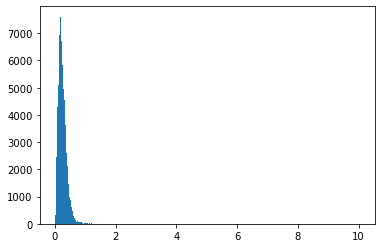

In [96]:
#plot the frequency of the debt to income ration
plot_hist(df,"DebtToIncomeRatio",0.02);

* Depending on our understanding of how we can calculate the debt to income ration we can determined that all above 1 is rong calculated

In [97]:
# making a dataframe contains number less than one
debt_df=df[df["DebtToIncomeRatio"]<=1]

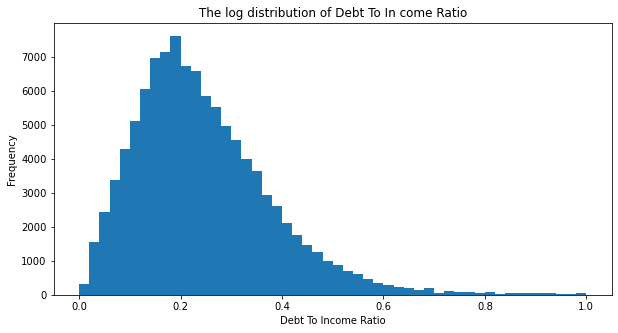

In [98]:
plt.figure(figsize=[10,5])

# ploting the new values
plot_hist(debt_df,"DebtToIncomeRatio",0.02);

# lables and title for the graph
plt.xlabel("Debt To Income Ratio")
plt.ylabel("Frequency")
plt.title(" The log distribution of Debt To In come Ratio ");

* The graph is very better now (right skewed )and we can notice that we have a beak around 0.2 wich is good 

#### 7. Total Prosper Loans column
    I am interesting to know are people interested to take many loans or not?

In [99]:
#converting the column type to str
df["TotalProsperLoans"]=df["TotalProsperLoans"].astype(str)

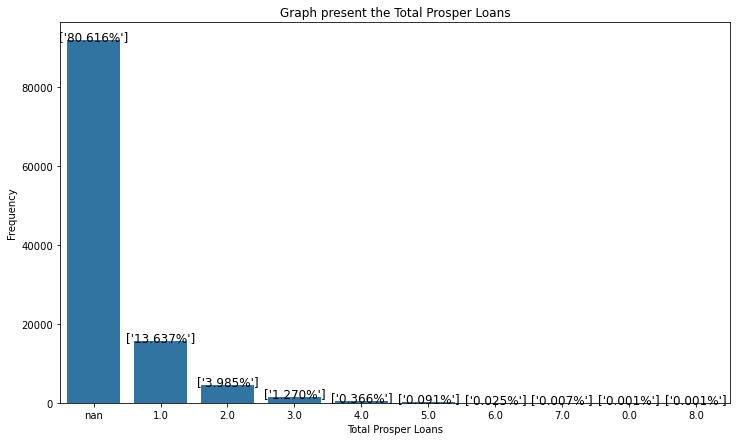

In [100]:
plt.figure(figsize=[12,7])
plot_vertical_bar(df,"TotalProsperLoans");

# labels and title
plt.xlabel("Total Prosper Loans")
plt.ylabel("Frequency")
plt.title("Graph present the Total Prosper Loans")

column_count=df["TotalProsperLoans"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.3f}%".format(100*count/df.shape[0])]
    plt.text(loc,count,pct_string,ha="center",fontsize=12)

* Around 80% of the people don't have past loans

### The second thing we will explore columns related to the loan

#### Listing Category column
    I am interesting to know where will the mony go for?

First we will make a list contains keys which in column and the describtion of the number
and then maping the value using .map() [Link](https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict)

In [101]:
# making the list
listing_cat={0:"Not Available",1:"Debt Consolidation",2:"Home Improvement", 3 :"Business", 4:"Personal Loan",
             5: "Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption",
             9 :"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring", 12:"Green Loans",
             13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental",
             16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}

In [102]:
# remaping the keys with values from the dic
df["ListingCategory (numeric)"]=df["ListingCategory (numeric)"].map(listing_cat) 

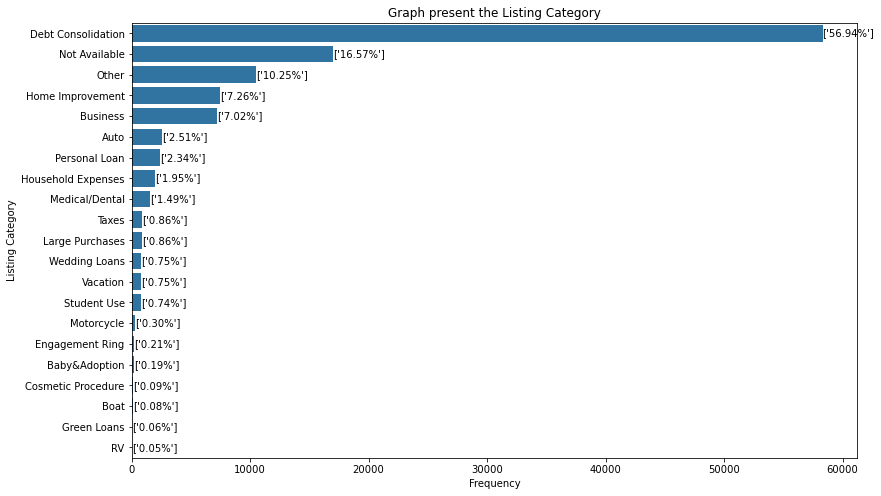

In [103]:
#ploting the bar chart
plt.figure(figsize=[13,8])
plot_horizontal_bar(df,"ListingCategory (numeric)")

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Listing Category")
plt.title("Graph present the Listing Category");

#add % at the end of each bar
column_count=df["ListingCategory (numeric)"].value_counts()
for i in range(column_count.shape[0]):
    count=column_count[i]
    pct_string=["{:0.2f}%".format(100*count/new_df.shape[0])]
    plt.text(count+1,i,pct_string,va="center")
  


* Around 57% going to Debt Consolidation, 7.26% fro home improvement and 7.02% for business purpuse

#### Term column (The lenght of the loan per month)
    I am interesting to know the peoples prefere to take a loan with how many months?

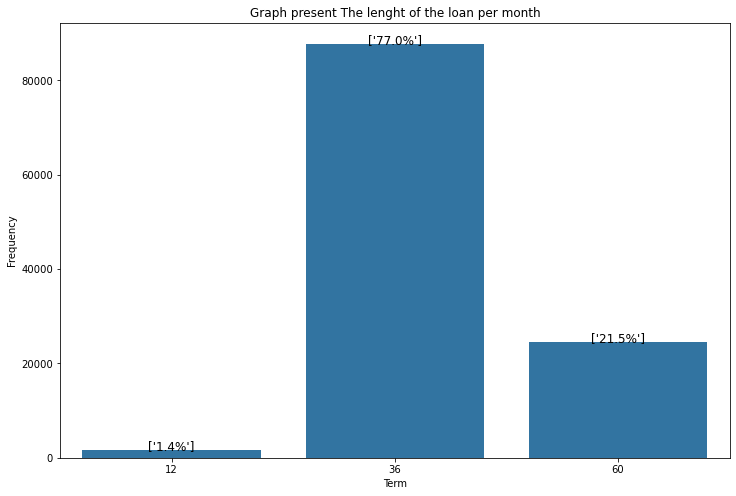

In [104]:
plt.figure(figsize=[12,8])
df["Term"]=df["Term"].astype(str)
order=["12","36","60"]
color=sb.color_palette()[0]
sb.countplot(data=df,x="Term",order=order,color=color)

#labels and title
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title("Graph present The lenght of the loan per month");

term_count=df["Term"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=term_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

* We can notes from this graph that around 77% of people prefare to take a loan with 36 months

#### 3. Loan Status column 
    I am interesting to know what is the most frequently status ?

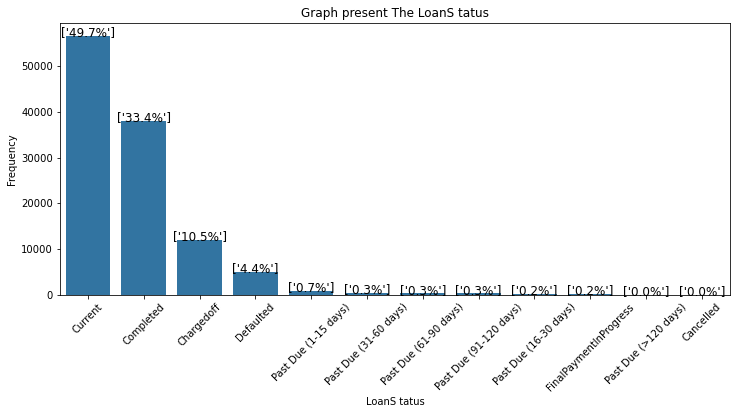

In [105]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"LoanStatus");

#labels and title
plt.xlabel("LoanS tatus")
plt.ylabel("Frequency")
plt.title("Graph present The LoanS tatus");

term_count=df["LoanStatus"].value_counts()
locs,labels=plt.xticks(rotation = 45)
for loc,label in zip(locs,labels):
    count=term_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

* Current loans is the most frequently status with around 50%

#### 4. Loan Origination Date column 

* I am interesting to know what the distribution of the loans number per quarter
* Link to help in converting the column type [Link](https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime)

In [106]:
#converting loan original date to date time type
df["LoanOriginationDate"]=pd.to_datetime(df["LoanOriginationDate"])

* Link to help in extracting the quarter from the date time column [Link](https://stackoverflow.com/questions/50459301/how-to-convert-dates-to-quarters-in-python)

In [107]:
# extracting the quarter from the date time column 
df['quarter'] = pd.PeriodIndex(df["LoanOriginationDate"], freq='Q')

* Link to help in sorting columns [Link](https://datatofish.com/sort-pandas-dataframe/)

In [108]:
# sorting the quarter column 
df.sort_values(by=['quarter'], inplace=True)

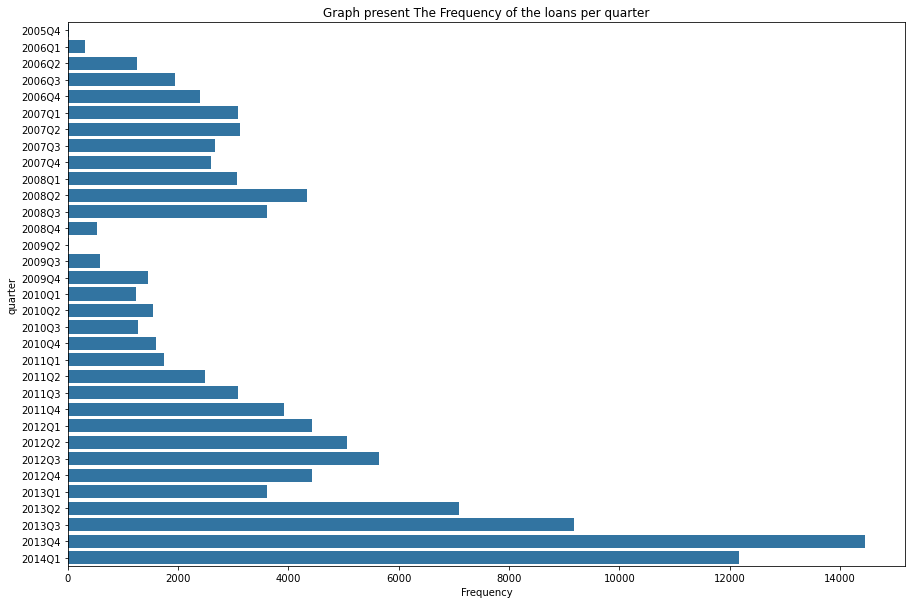

In [109]:
#ploting the bar chart
plt.figure(figsize=[15,10])
color=sb.color_palette()[0]
sb.countplot(data=df,y="quarter",color=color);

#labels and title
plt.xlabel("Frequency")
plt.ylabel("quarter")
plt.title("Graph present The Frequency of the loans per quarter");

* This graph is interesting because we can note that after 2009 Q2 we have extremly increase in the number of loans and the most high quarter is Q4 in 2013 with around 14,450 loan

#### Loan Original Amount column 
    I am interesting to know what is the most frequently amount that people are interested to take it as a loan

In [110]:
df["LoanOriginalAmount"].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

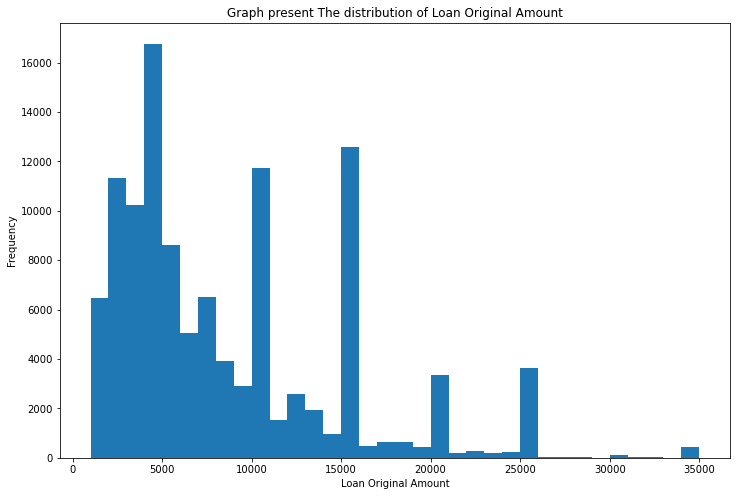

In [111]:
plt.figure(figsize=[12,8])
plot_hist(df,"LoanOriginalAmount",1000);

#labels and title
plt.xlabel("Loan Original Amount")
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Loan Original Amount");

* The most of people are interested in taking loans with fixid amunt like 5K, 10K, 15K, and so on 

#### 6. Monthly Loan Payment column 
    I am interesting to know what is the most amount that people bay for the lender per month

In [112]:
df["MonthlyLoanPayment"].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

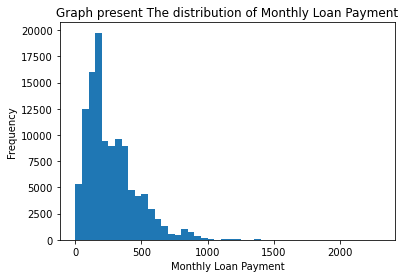

In [113]:
plot_hist(df,"MonthlyLoanPayment",50);

#labels and title
plt.xlabel("Monthly Loan Payment")
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Monthly Loan Payment");

* This graph is right skewed and we have beak around 210$

### The third thing we will explore the credit Risk metrics

#### The prosper rating (alpha)
* I am interesting to know what is the prosper rating distribution
* here is a alink to get understand of the prosper rating [Link](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline)

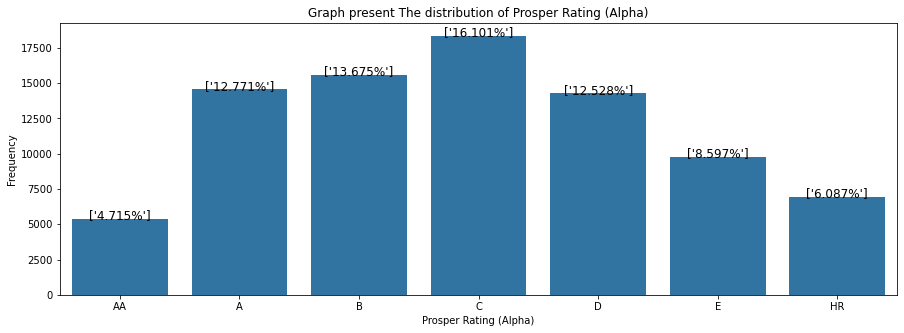

In [114]:
plt.figure(figsize=[15,5])
color=sb.color_palette()[0]
order=["AA","A","B","C","D","E","HR"]
sb.countplot(data=df,x="ProsperRating (Alpha)",color=color,order=order)

#labels and title
plt.xlabel("Prosper Rating (Alpha)")
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Prosper Rating (Alpha)");

column_count=df["ProsperRating (Alpha)"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.3f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

* Aroung 16% have a category C which is equal to 6.00–8.99%

#### The Borrower APR
* I am interesting to know what is the distribution of the borrower APR
    
* this link will be useful in understanding the meaning of borrower APR [Link](https://www.nerdwallet.com/article/mortgages/apr-annual-percentage-rate)

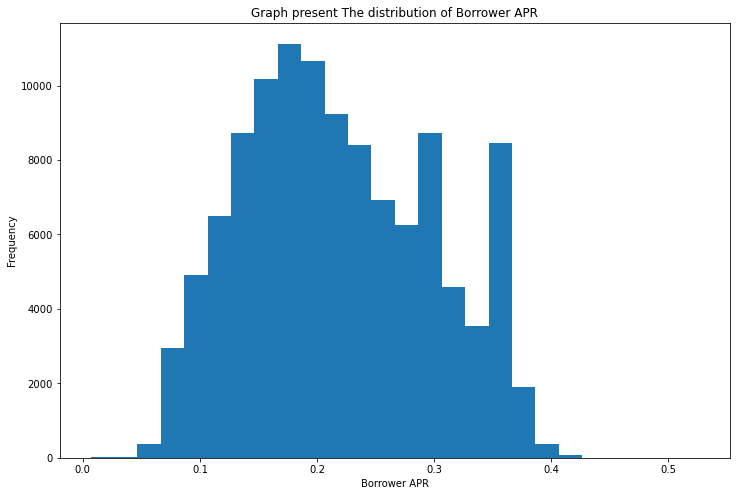

In [149]:
plt.figure(figsize=[12,8])

plot_hist(df,"BorrowerAPR",0.02);

#labels and title
plt.xlabel("Borrower APR")
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Borrower APR");

* The distribution is normaly and we have a beak around 0.2

#### 3. The Borrower Rate
    I am interesting to know what is the most borrower rate?

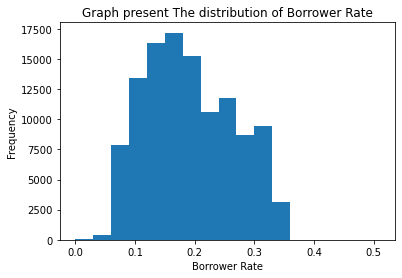

In [116]:
plot_hist(df,"BorrowerRate",0.03);

#labels and title
plt.xlabel("Borrower Rate")
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Borrower Rate");

* The distribution is normaly and the peak is between 0.1 nad 0.2

#### 4. The Lender Yield
    I am interesting to know the distribution of the lender yield?

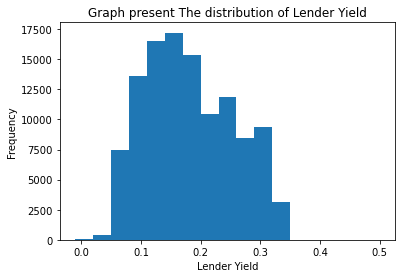

In [117]:
plot_hist(df,"LenderYield",0.03);

#labels and title
plt.xlabel("Lender Yield")
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Lender Yield");

* The distribution is normally and we have a peak between 0.1 and 0.2

#### 5. The Open Credit Lines
    I am interesting to know the distribution of open credit lines?

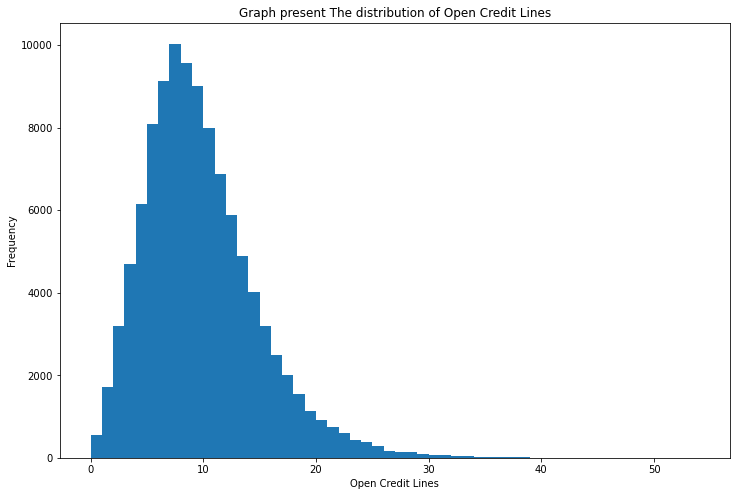

In [118]:
plt.figure(figsize=[12,8])
plot_hist(df,"OpenCreditLines",1);

plt.xlabel("Open Credit Lines")
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Open Credit Lines");

* The distribution seems like right skewed and we have a beak between 7 and 10

#### 6. The Amount Delinquent
    I am interesting to know the distribution of Amount Delinquent?

In [119]:
df["AmountDelinquent"].describe()

count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

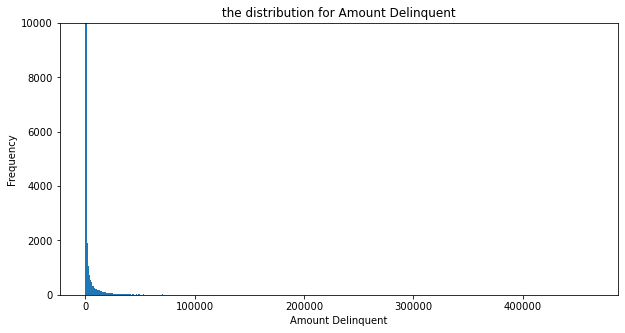

In [120]:
plt.figure(figsize=[10,5])
plot_hist(df,"AmountDelinquent",1000);
plt.ylim(0,10000)

# lables and title for the graph
plt.xlabel("Amount Delinquent");
plt.ylabel("Frequency");
plt.title(" the distribution for Amount Delinquent ");

In [155]:
np.log(df["AmountDelinquent"].describe())

count    11.574162
mean      6.892141
std       8.876024
min           -inf
25%           -inf
50%           -inf
75%           -inf
max      13.047383
Name: AmountDelinquent, dtype: float64

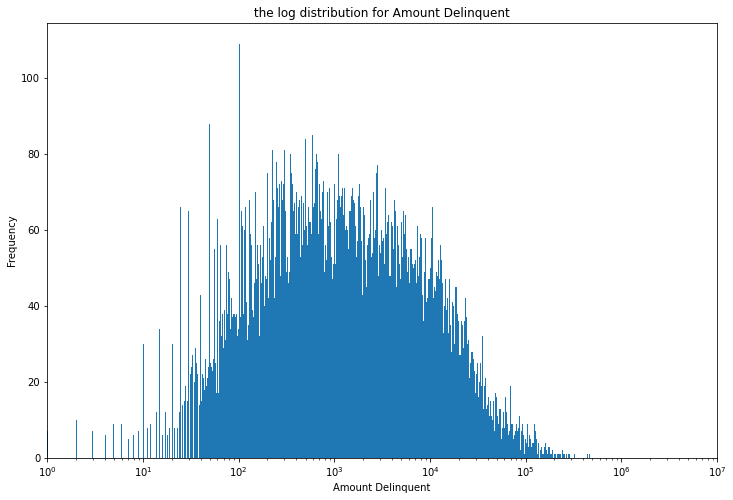

In [154]:
plt.figure(figsize=[12,8]);
#implementing the log scale
bins=10**np.arange(0,13+1,0.01);
plt.hist(data=df,x="AmountDelinquent",bins=bins);
plt.xscale("log");
# making limit for the x axis to get bitter insites
plt.xlim(1e0,1e7);

# lables and title for the graph
plt.xlabel("Amount Delinquent");
plt.ylabel("Frequency");
plt.title(" the log distribution for Amount Delinquent ");

* The graph is normaly distributed and the peak is around 1K

#### 7. The Loan Current Days Delinquent
    I am interesting to know the distribution of The Loan Current Days Delinquent?

In [123]:
df["LoanCurrentDaysDelinquent"].describe()

count    113937.000000
mean        152.816539
std         466.320254
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2704.000000
Name: LoanCurrentDaysDelinquent, dtype: float64

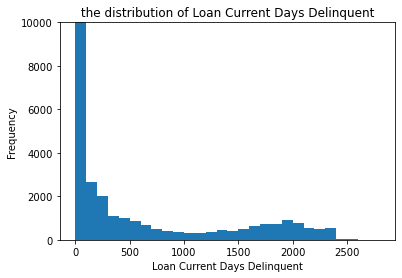

In [124]:
plot_hist(df,"LoanCurrentDaysDelinquent",100);

#making limit to y axis to help us to see the distribution 
plt.ylim(0,10000);

# lables and title for the graph
plt.xlabel("Loan Current Days Delinquent");
plt.ylabel("Frequency");
plt.title(" the distribution of Loan Current Days Delinquent ");

* Most of the delinquent people is less than 500 days delinque

#### 8. The Prosper Score
* I am interesting to know the distribution of Prosper Score?
    
* Here is a link to get better understand [Link](https://www.prosper.com/plp/general-prosper_score/)

In [125]:
df["ProsperScore"].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

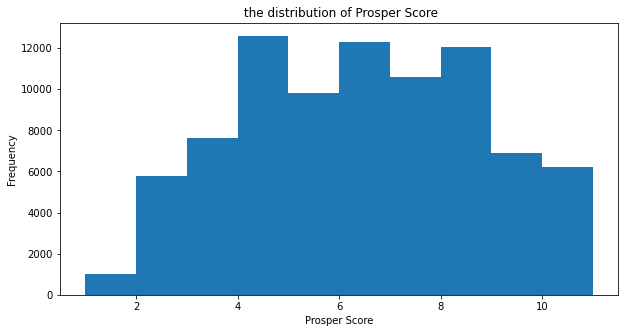

In [126]:
plt.figure(figsize=[10,5])
plot_hist(df,"ProsperScore",1);

# lables and title for the graph
plt.xlabel("Prosper Score");
plt.ylabel("Frequency");
plt.title(" the distribution of Prosper Score");

* The highest prosper score is 4

## Conclusion about Univariate Exploration

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I performed some transformations like changing the column types to be categorical values for examble (TotalProsperLoans)
and we notesed some outliers and we deal with them using axis lim() function 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In some numdrical distribution we found that it had long tail which prevent us from taking useful insites so i used the log transformation scale.

## Bivariate Exploration

In this section, we will investigate relationships between pairs of variables in dataset.

#### The relation between all numeric variables

In [127]:
quant_vars=["StatedMonthlyIncome","DebtToIncomeRatio","LoanOriginalAmount","MonthlyLoanPayment","BorrowerAPR","BorrowerRate","LenderYield","OpenCreditLines","AmountDelinquent","LoanCurrentDaysDelinquent","ProsperScore"]

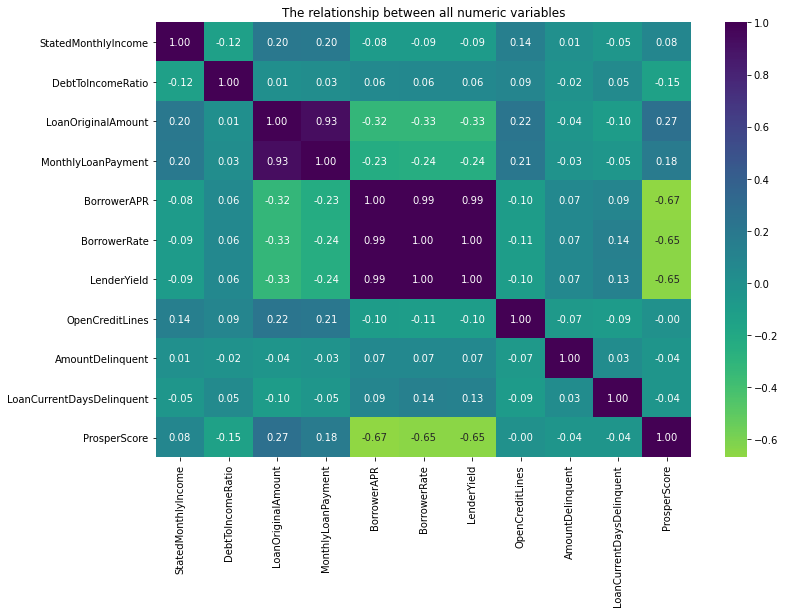

In [128]:
#ploting the correlation heat map between the quantitative selected variables
plt.figure(figsize=[12,8])
sb.heatmap(df[quant_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'viridis_r', center = 0)
#title
plt.title("The relationship between all numeric variables");

1. The Loan original amount has a strong positive relationship with the monthly loan payment
2. The borrower APR has a strong positive relationship with the lenderyield
3. The prosber score has a negative relationship with borrower APR and lenderyeild
4. The Loan original amount has a negative relationship with borrower Rate and lenderyeild but not strongly

#### 2. The relation between Loan Original Amount and Monthly Loan Payment

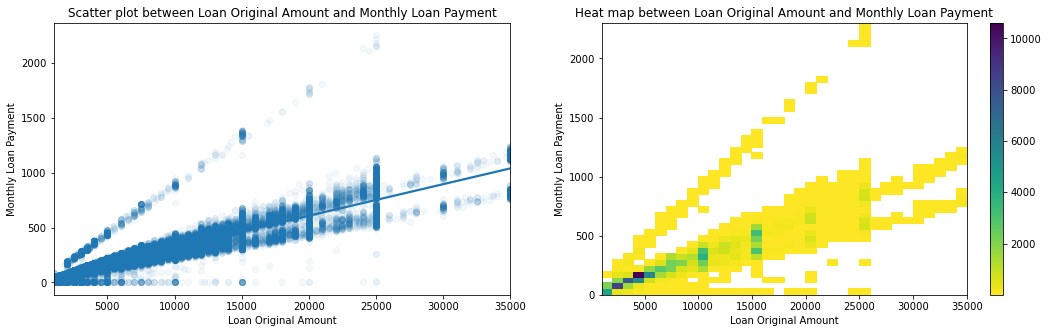

In [129]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df,x="LoanOriginalAmount",y="MonthlyLoanPayment",scatter_kws={"alpha":1/20});
plt.xlabel("Loan Original Amount");
plt.ylabel("Monthly Loan Payment");
plt.title("Scatter plot between Loan Original Amount and Monthly Loan Payment");

plt.subplot(1, 2, 2)
x_bin = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+1000,1000)
y_bin = np.arange(df['MonthlyLoanPayment'].min(), df['MonthlyLoanPayment'].max()+50, 50)
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Loan Original Amount");
plt.ylabel("Monthly Loan Payment");
plt.title("Heat map between Loan Original Amount and Monthly Loan Payment");

* The relation between loan original amount and monthly loan payment is strongly positive in poth heat map and scatter plot 

#### The relation between Borrower APR and Lender Yield

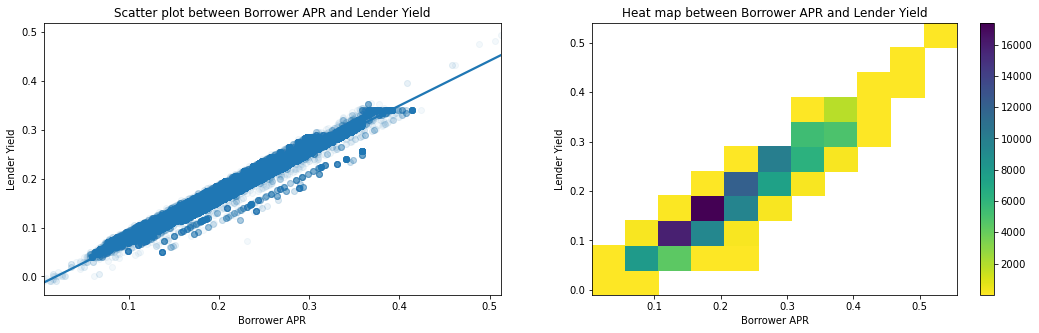

In [150]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df,x="BorrowerAPR",y="LenderYield",scatter_kws={"alpha":1/20});
plt.xlabel("Borrower APR");
plt.ylabel("Lender Yield");
plt.title("Scatter plot between Borrower APR and Lender Yield");

plt.subplot(1, 2, 2)
x_bin = np.arange(df['BorrowerAPR'].min(), df['BorrowerAPR'].max()+0.05,0.05)
y_bin = np.arange(df['LenderYield'].min(), df['LenderYield'].max()+0.05,0.05)
plt.hist2d(data = df, x = 'BorrowerAPR', y = 'LenderYield', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Borrower APR");
plt.ylabel("Lender Yield");
plt.title("Heat map between Borrower APR and Lender Yield");

* The relation between Borrower APR and Lendr yield is strongly positive in poth heat map and scatter plot 

#### The relation between Prosper Scoreand Borrower APR

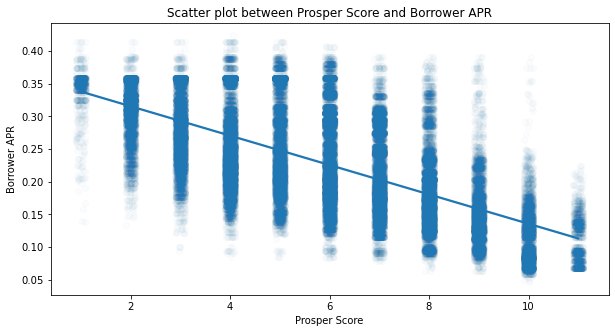

In [131]:
plt.figure(figsize = [10, 5])
sb.regplot(data=df,x="ProsperScore",y="BorrowerAPR",scatter_kws={"alpha":1/50},x_jitter=0.1);
plt.xlabel("Prosper Score");
plt.ylabel("Borrower APR");
plt.title("Scatter plot between Prosper Score and Borrower APR");

* We had a strongly negative relationship between Borrower APR and Prosper Score

#### 5. The relation between Loan Original Amount and Borrower Rate

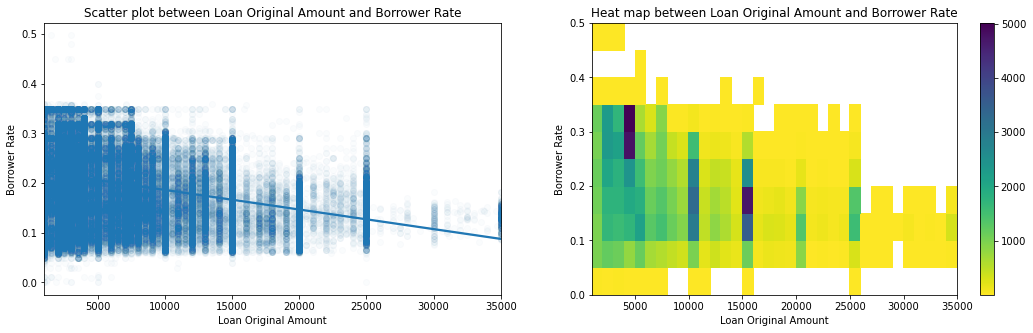

In [132]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df,x="LoanOriginalAmount",y="BorrowerRate",scatter_kws={"alpha":1/50});
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower Rate");
plt.title("Scatter plot between Loan Original Amount and Borrower Rate");

plt.subplot(1, 2, 2)
x_bin = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+1000,1000)
y_bin = np.arange(df['BorrowerRate'].min(), df['BorrowerRate'].max()+0.05, 0.05)
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower Rate");
plt.title("Heat map between Loan Original Amount and Borrower Rate");

* The relation between Loan Original Amount and Borrower Rate is negative but not strongly

#### The relation between Term (The length of the loan per month) and Borrower APR

* Link to help in ploting and ordering the violin plot [Link](https://www.python-graph-gallery.com/55-control-order-of-groups-in-violinplot-seaborn)

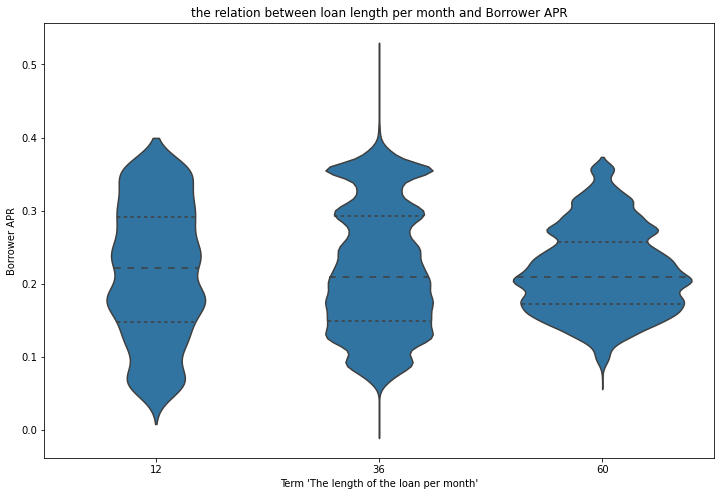

In [133]:
term=["12","36","60"]
tclasses=pd.api.types.CategoricalDtype(ordered=True,categories=term)
df["Term"]=df["Term"].astype(tclasses)

plt.figure(figsize = [12, 8])
color=sb.color_palette()[0]
sb.violinplot(data=df,x="Term",y="BorrowerAPR",color=color,inner="quartile")
# labels and title
plt.xlabel("Term 'The length of the loan per month'");
plt.ylabel("Borrower APR");
plt.title("the relation between loan length per month and Borrower APR");

* 36 months loan has a wider range of Borrower APR but we need to focus more so we will apply the FacetGrid 

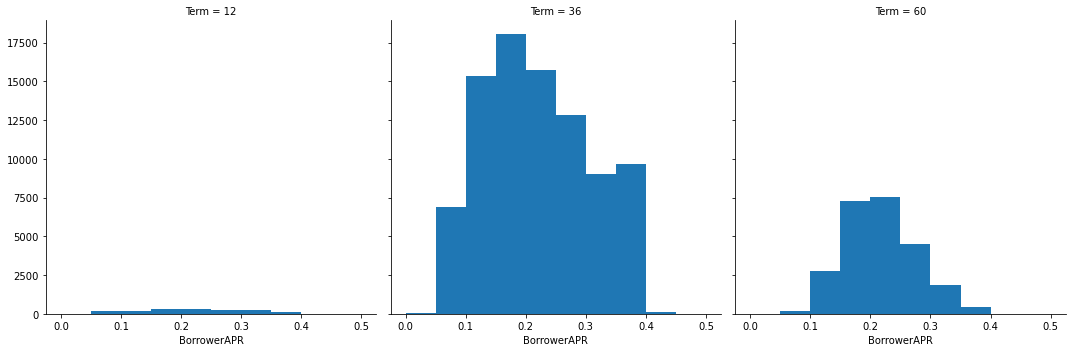

In [135]:
bin_edge=np.arange(0,0.5+0.05,.05)
g=sb.FacetGrid(data=df,col="Term",height=5);
g.map(plt.hist,"BorrowerAPR",bins=bin_edge);

* Now it's look more clearly 36 months has the wider borrower APR and also has more frequency comparing with 12, 60 months

#### 7. The relation between Loan Original Amount and Listing Category

In [136]:
my_order = df.groupby(by=["ListingCategory (numeric)"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index
my_order

Index(['Debt Consolidation', 'Baby&Adoption', 'Wedding Loans', 'Business',
       'Boat', 'Engagement Ring', 'Large Purchases', 'Home Improvement', 'RV',
       'Green Loans', 'Taxes', 'Not Available', 'Medical/Dental', 'Motorcycle',
       'Vacation', 'Household Expenses', 'Other', 'Cosmetic Procedure', 'Auto',
       'Personal Loan', 'Student Use'],
      dtype='object', name='ListingCategory (numeric)')

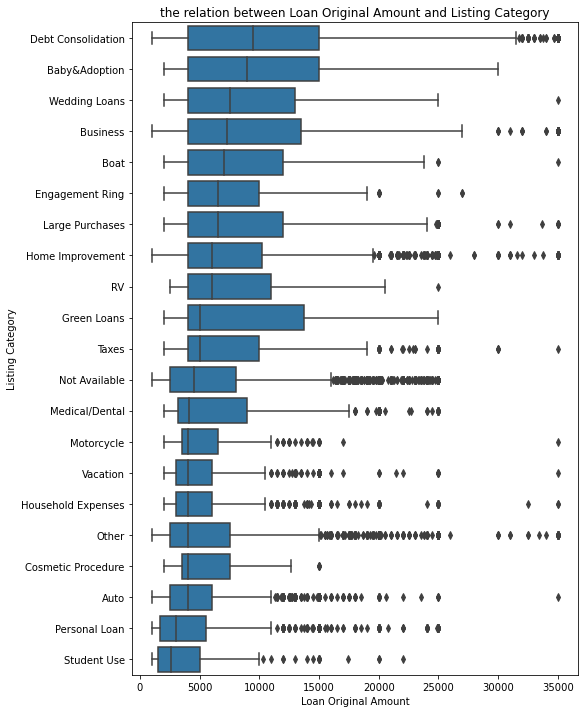

In [137]:
plt.figure(figsize=[8,12])
color=sb.color_palette()[0]

my_order = df.groupby(by=["ListingCategory (numeric)"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,y="ListingCategory (numeric)",x="LoanOriginalAmount",color=color,order=my_order);
plt.xlabel("Loan Original Amount");
plt.ylabel("Listing Category");
plt.title("the relation between Loan Original Amount and Listing Category");

* We can notice that (Debt consolidation) has a highest median and (student use) has a lowest median 

#### 8. The relation between Occupation and Loan Original Amount

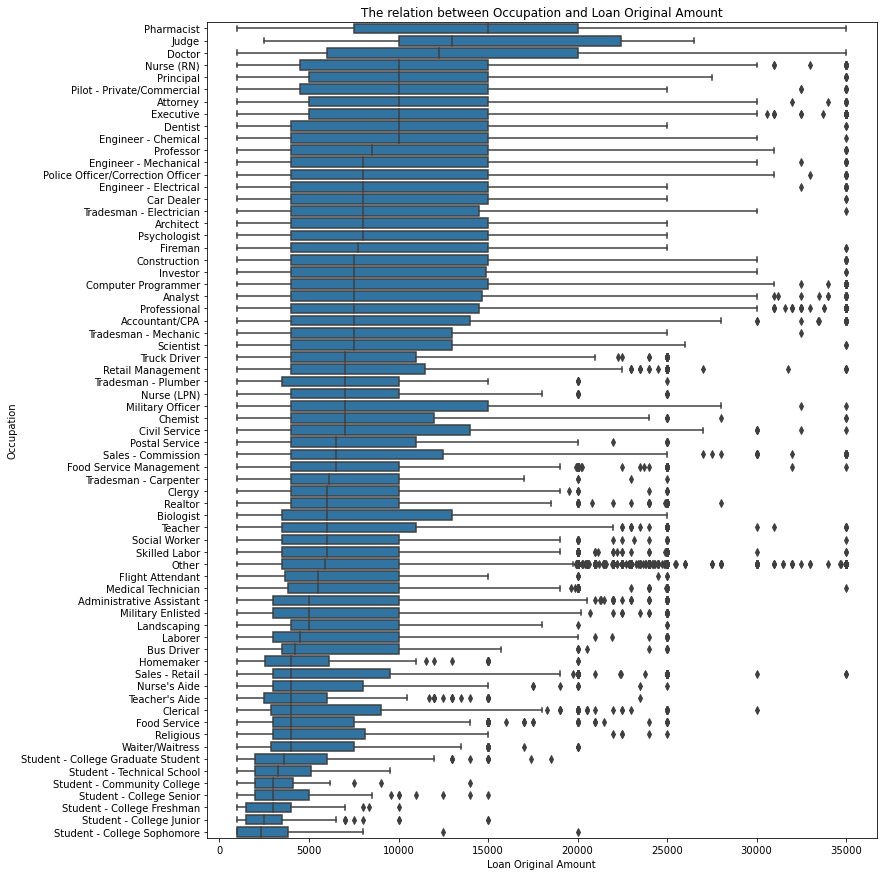

In [138]:
plt.figure(figsize=[12,15])
color=sb.color_palette()[0]

my_order = df.groupby(by=["Occupation"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,y="Occupation",x="LoanOriginalAmount",color=color,order=my_order)
# sitting labeles and title
plt.ylabel("Occupation");
plt.xlabel("Loan Original Amount");
plt.title("The relation between Occupation and Loan Original Amount");

* We can notice that students take a loan with less amount and the pharmacist the higher

#### The relation between Employment status and Borrower APR

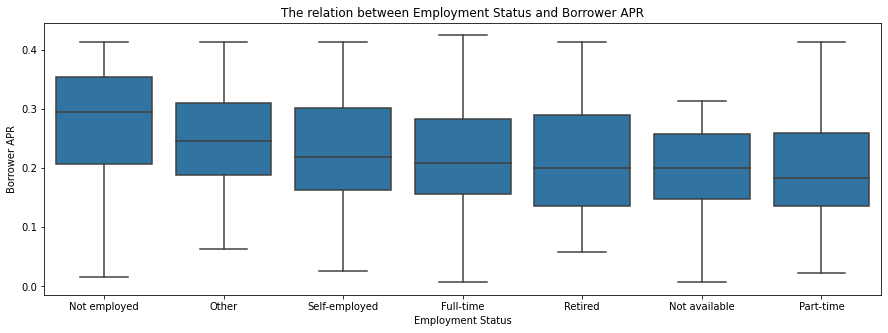

In [139]:
plt.figure(figsize=[15,5])
color=sb.color_palette()[0]

my_order = df.groupby(by=["EmploymentStatus"])["BorrowerAPR"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,x="EmploymentStatus",y="BorrowerAPR",color=color,order=my_order)
# sitting labeles and title
plt.xlabel("Employment Status");
plt.ylabel("Borrower APR");
plt.title("The relation between Employment Status and Borrower APR");

* Not employed has a lighest median and part-time has the lowest median 
full-time has the widest range in the Borrower APR

#### 10. The relation between  Loan Status and Borrower APR

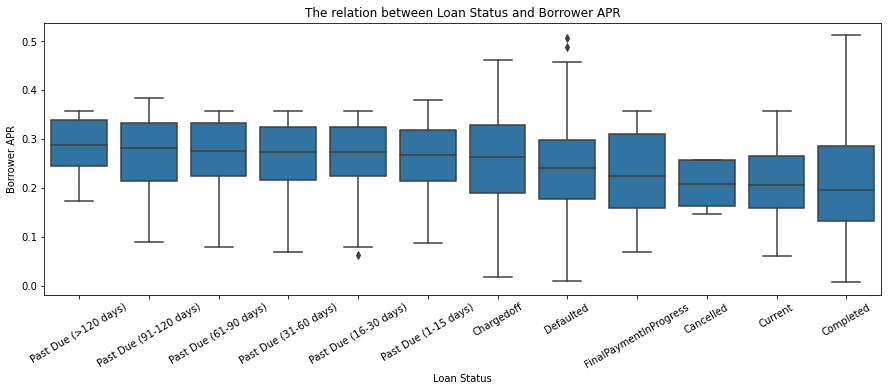

In [140]:
plt.figure(figsize=[15,5])
color=sb.color_palette()[0]

my_order = df.groupby(by=["LoanStatus"])["BorrowerAPR"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,y="BorrowerAPR",x="LoanStatus",color=color,order=my_order);
plt.xlabel("Loan Status");
plt.ylabel("Borrower APR");
plt.title("The relation between Loan Status and Borrower APR");
plt.xticks(rotation=30);

* Past Due(>120 days) has a highest median Borrower APR
* We need to focus more bout the distribution of borrower APR among the loan status

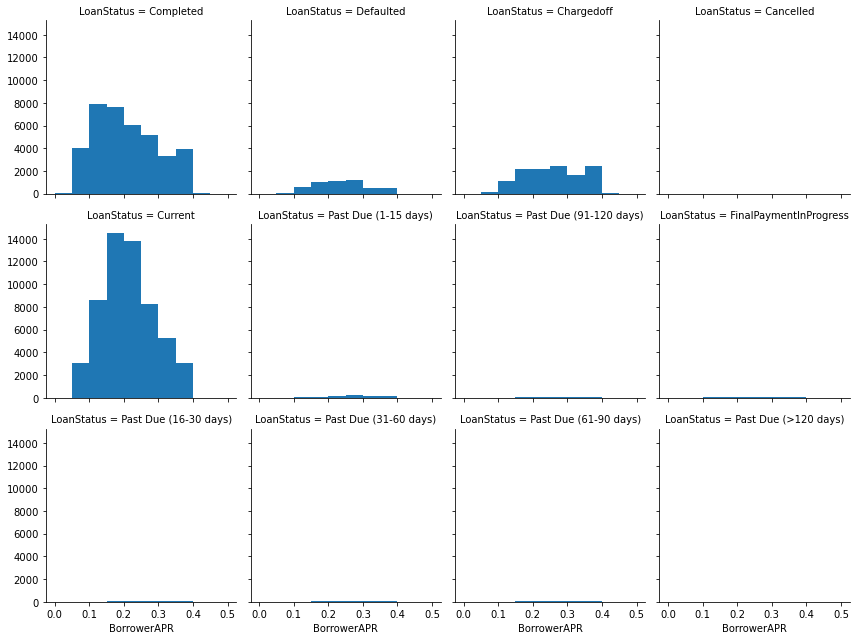

In [141]:
bin_edge=np.arange(0,0.5+0.05,.05)
g=sb.FacetGrid(data=df,col="LoanStatus",col_wrap=4)
g.map(plt.hist,"BorrowerAPR",bins=bin_edge);

* Past Due(16-30 days) has a highst frequency among the loan status 

#### The relation between  Income Range and Term

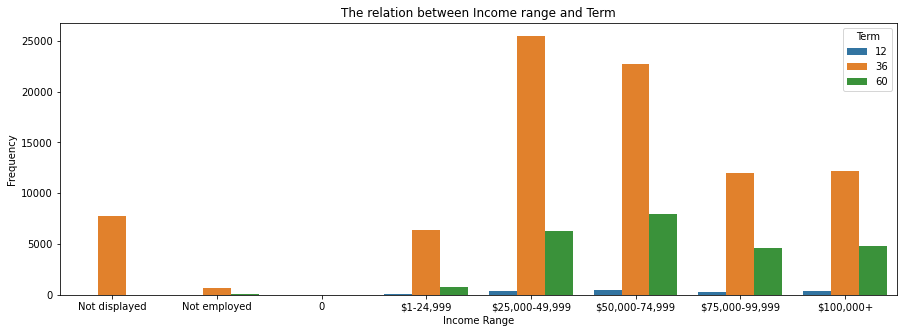

In [142]:
plt.figure(figsize=[15,5])

income_order=["Not displayed","Not employed","0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]

incoms=pd.api.types.CategoricalDtype(ordered=True,categories=income_order)
df["IncomeRange"]=df["IncomeRange"].astype(incoms)

sb.countplot(data=df,x="IncomeRange",hue="Term");

#labels and title
plt.xlabel("Income Range");
plt.ylabel("Frequency");
plt.title("The relation between Income range and Term");

* In all income ranges people prefered to take a loan with 36 months

## Conclusion about Bivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* When Borrower APR increase the lender yield increase also.
* Borrower APR has strongly -ve relationship with prosper score
* 36 months loan term has the heighst frequency and wider Borrower APR range
* People prefer to take loan with 36 months term and it is not depend on the income range

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Peoples take loan for Debt consolidation more than any category 
* Students take the lowest loan original amounts 
* People with high monthly rate taking high loans 

## Multivariate Exploration

Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### 1. The relation between Income Range & Loan Original Amount & Term

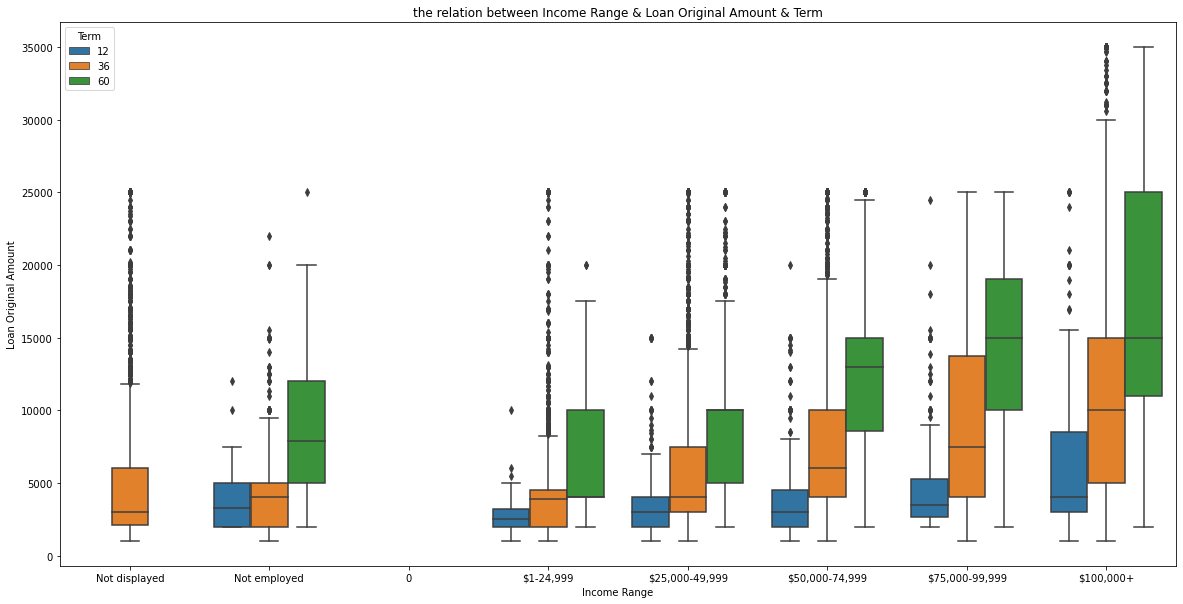

In [143]:
plt.figure(figsize=[20,10])
sb.boxplot(data=df,x="IncomeRange",y="LoanOriginalAmount",hue="Term");
plt.xlabel("Income Range");
plt.ylabel("Loan Original Amount");
plt.title("the relation between Income Range & Loan Original Amount & Term");

* It is very interesting in each income reange when the loan original amount icreased the medina of 60 months term increase more than 12 and 36 months term medians 

#### The relation between  Listing Category & Loan Original Amount & Term

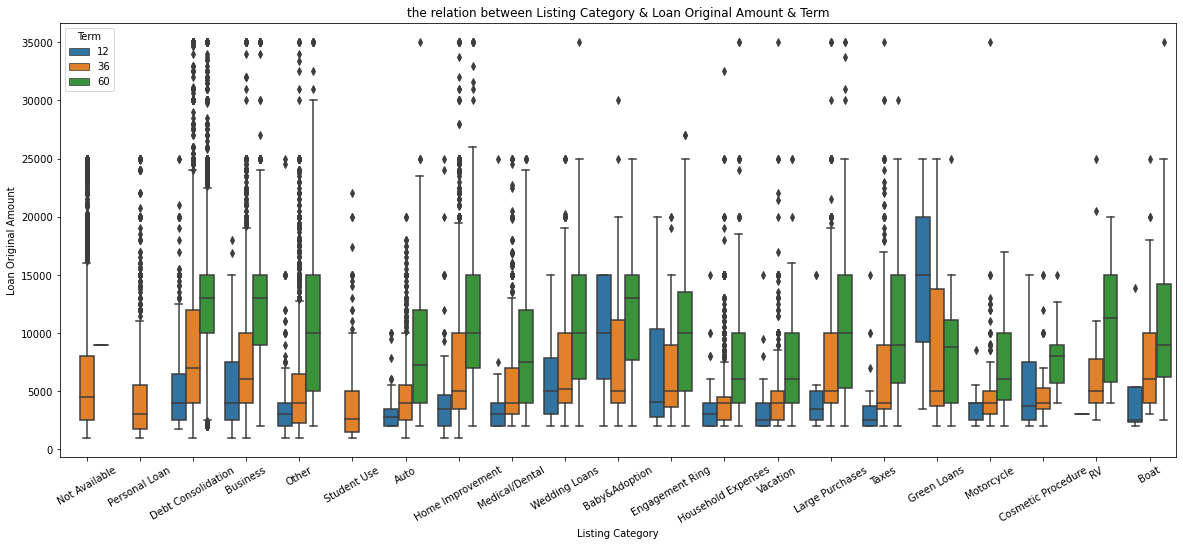

In [144]:
plt.figure(figsize=[20,8])
sb.boxplot(data=df,x="ListingCategory (numeric)",y="LoanOriginalAmount",hue="Term");
plt.xlabel("Listing Category");
plt.ylabel("Loan Original Amount");
plt.title("the relation between Listing Category & Loan Original Amount & Term");
plt.xticks(rotation =30);

* It is interesting because the median of 12 months term of green loans category is higher than other two terms
* The reange of 12 months term in cosmetic procedure is largest than the other two terms
* Personal loan and student use loan taking 36 months terms only

#### The relation between Loan Status & Borrower APR & Employment Status

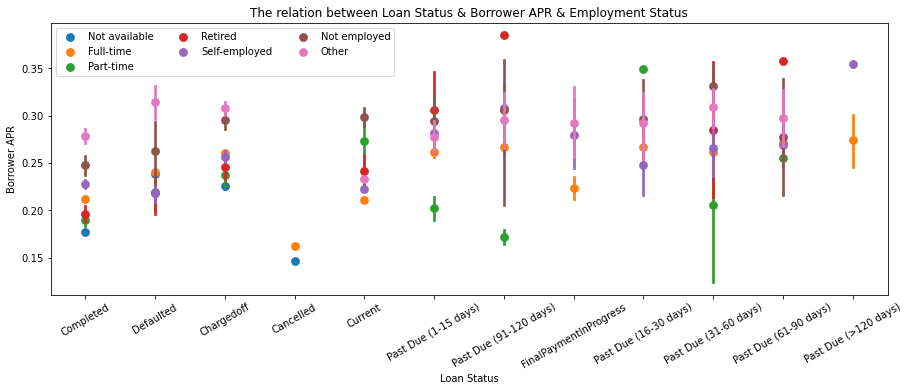

In [158]:
plt.figure(figsize=[15,5])
sb.pointplot(data=df,x="LoanStatus",y="BorrowerAPR",hue="EmploymentStatus",linestyles="");
plt.xticks(rotation =30);
plt.legend(ncol=3);

plt.ylabel("Borrower APR")
plt.xlabel("Loan Status");
plt.title("The relation between Loan Status & Borrower APR & Employment Status");

* From this graph we can note that when the loan status is past due(91-120 days) the retired employes had the highest borrower APR

* People with full time and part time jobs had a lower borrower APR in all loan status 


#### The relation between Borrower APR & Lender Yield & ProsperScore

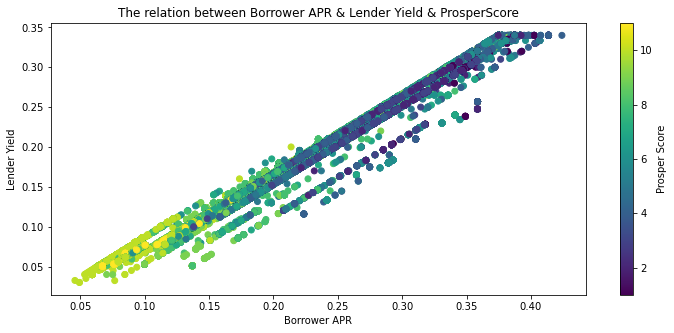

In [146]:
plt.figure(figsize=[12,5])
plt.scatter(data=df,x="BorrowerAPR",y = "LenderYield",c="ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("Lender Yield");
plt.title("The relation between Borrower APR & Lender Yield & ProsperScore");
plt.colorbar(label="Prosper Score");

* This graph shows that the loans with higher Borrower APR and Lender yield had a lower prosper score.

## Conclusion about Multivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* The relationships show that the loans with higher borrower APR and Lender yield tends to had a lower prosper sore
* People with full time and part time jobs had a lower borrower APR in all loan status 

### Were there any interesting or surprising interactions between features?

* In each income reange when the loan original amount icreased the medina of 60 months term increase more than 12 and 36 months term medians
* It is interesting because the median of 12 months term of green loans category is higher than other two terms
* The reange of 12 months term in cosmetic procedure is largest than the other two terms
* Personal loan and student use loan taking 36 months terms only

In [160]:
!jupyter nbconvert Prosper_Loan_Data.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Prosper_Loan_Data.ipynb to slides
[NbConvertApp] Writing 1357956 bytes to Prosper_Loan_Data.slides.html
